# 🔹UFC Fight Predictor Feature Engineering

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 1. Import Libraries and Setup Environment

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root, 'src'))
from helpers import *
from io_model import *
from data import UFCData

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 2. Load Data

In [2]:
# Define the path to the CSV file
file_path = os.path.join(project_root, 'data', 'processed', 'ufc_etl.csv')

# Load the CSV into a DataFrame
try:
    ufc_df = pd.read_csv(file_path)
    print_header(f"Data loaded succesfully", color='bright_green')
except Exception as e:
    print_header(f"Error loading data: {e}", color='bright_red')

╔═══════════════════════════╗
║  Data loaded succesfully  ║
╚═══════════════════════════╝


<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 3. Initialize UFCData object

In [3]:
ufc_data = UFCData(ufc_df)
ufc_data.summary()

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6300
🧪 Train/Test split  : 5040 / 1260
🧪 Total features     : 59

🔢 Numerical features : 54
🔠 Categorical features: 5
    - Binary          : 2
    - Multiclass      : 3

🏷 Label distribution (raw):
   - Class 0: 3662 (58.1%)
   - Class 1: 2638 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                                mean      std      min       max
RedOdds                     -115.702  279.516 -2100.00   775.000
BlueOdds                      59.744  253.515 -1200.00  1300.000
NumberOfRounds                 3.193    0.588     3.00     5.000
BlueCurrentLoseStreak          0.494    0.789     0.00     6.000
BlueCurrentWinStreak           0.968    1.427     0.00    12.000
BlueDraws                      0.020    0.143     0.00     2.000
BlueLongestWinStreak           1.922    1.961     0.00    17.000
BlueLosses                     1.842    2.154     0.00    16.000
Blu

## 4. Feature Engineering

### Categorical Data

### Stance
- **Orthodox Stance:** A fighter in orthodox stance leads with their left foot and left hand, making it the natural stance for right-handed individuals. 
- **Southpaw Stance:** A fighter in southpaw stance leads with their right foot and right hand, making it the natural stance for left-handed individuals. 
- **Open Stance Matchup:** When one fighter is orthodox and the other is southpaw, it creates an "open stance" matchup. This differs from a "closed stance" where both fighters are in the same stance (e.g., both orthodox or both southpaw)
- **Switch:** When a fighter switches from an orthodox to a southpaw stance or vice versa, it can disrupt their opponent's rhythm, causing them to miss or react incorrectly to strikes. 

### Feature Construction

In [4]:
# Finish Rate (Red & Blue):
RedFinishRate = (ufc_df['RedWinsByKO'] + ufc_df['RedWinsBySubmission'] + ufc_df['RedWinsByTKODoctorStoppage']) / ufc_df['RedWins'].replace(0, 1)
BlueFinishRate = (ufc_df['BlueWinsByKO'] + ufc_df['BlueWinsBySubmission'] + ufc_df['BlueWinsByTKODoctorStoppage']) / ufc_df['BlueWins'].replace(0, 1)
ufc_df['FinishRate'] = BlueFinishRate - RedFinishRate

In [5]:
#Win Ratio (Red & Blue)
RedWinRatio = ufc_df['RedWins'] / (ufc_df['RedWins'] + ufc_df['RedLosses']).replace(0, 1)
BlueWinRatio = ufc_df['BlueWins'] / (ufc_df['BlueWins'] + ufc_df['BlueLosses']).replace(0, 1)
ufc_df['WinRatio']= BlueWinRatio - RedWinRatio 

In [6]:
# Experience per Age
RedExpPerAge = ufc_df['RedTotalRoundsFought'] / ufc_df['RedAge']
BlueExpPerAge = ufc_df['BlueTotalRoundsFought'] / ufc_df['BlueAge']
ufc_df['ExpPerAge'] = RedExpPerAge - BlueExpPerAge

In [7]:
# Reach Advantage Ratio
ufc_df['ReachAdvantageRatio'] = ufc_df['RedReachCms'] / ufc_df['BlueReachCms']

In [8]:
# Height/Reach Ratio
RedHeightReachRatio = ufc_df['RedHeightCms'] / ufc_df['RedReachCms']
BlueHeightReachRatio = ufc_df['BlueHeightCms'] / ufc_df['BlueReachCms']
ufc_df['HeightReachRatio']= BlueHeightReachRatio - RedHeightReachRatio

In [9]:
# Win By Decision
BlueWinsByDecision = ufc_df[['BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous']].sum(axis=1)
RedWinsByDecision = ufc_df[['RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous']].sum(axis=1)
ufc_df['WinsByDecision']=BlueWinsByDecision- RedWinsByDecision

In [10]:
# Decision Rate
BlueDecisionRate = BlueWinsByDecision / ufc_df['BlueWins'].replace(0, 1)  # Evitar división por cero
RedDecisionRate = RedWinsByDecision  / ufc_df['RedWins'].replace(0, 1)  # Evitar división por cero
ufc_df['DecisionRate']= BlueDecisionRate - RedDecisionRate

## 5. Update UFCData object

In [11]:
ufc_data = UFCData(ufc_df)
ufc_data.summary()

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6300
🧪 Train/Test split  : 5040 / 1260
🧪 Total features     : 66

🔢 Numerical features : 61
🔠 Categorical features: 5
    - Binary          : 2
    - Multiclass      : 3

🏷 Label distribution (raw):
   - Class 0: 3662 (58.1%)
   - Class 1: 2638 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                                mean      std       min       max
RedOdds                     -115.702  279.516 -2100.000   775.000
BlueOdds                      59.744  253.515 -1200.000  1300.000
NumberOfRounds                 3.193    0.588     3.000     5.000
BlueCurrentLoseStreak          0.494    0.789     0.000     6.000
BlueCurrentWinStreak           0.968    1.427     0.000    12.000
BlueDraws                      0.020    0.143     0.000     2.000
BlueLongestWinStreak           1.922    1.961     0.000    17.000
BlueLosses                     1.842    2.154     0.000    1

## 6. Check Correlation Matrix

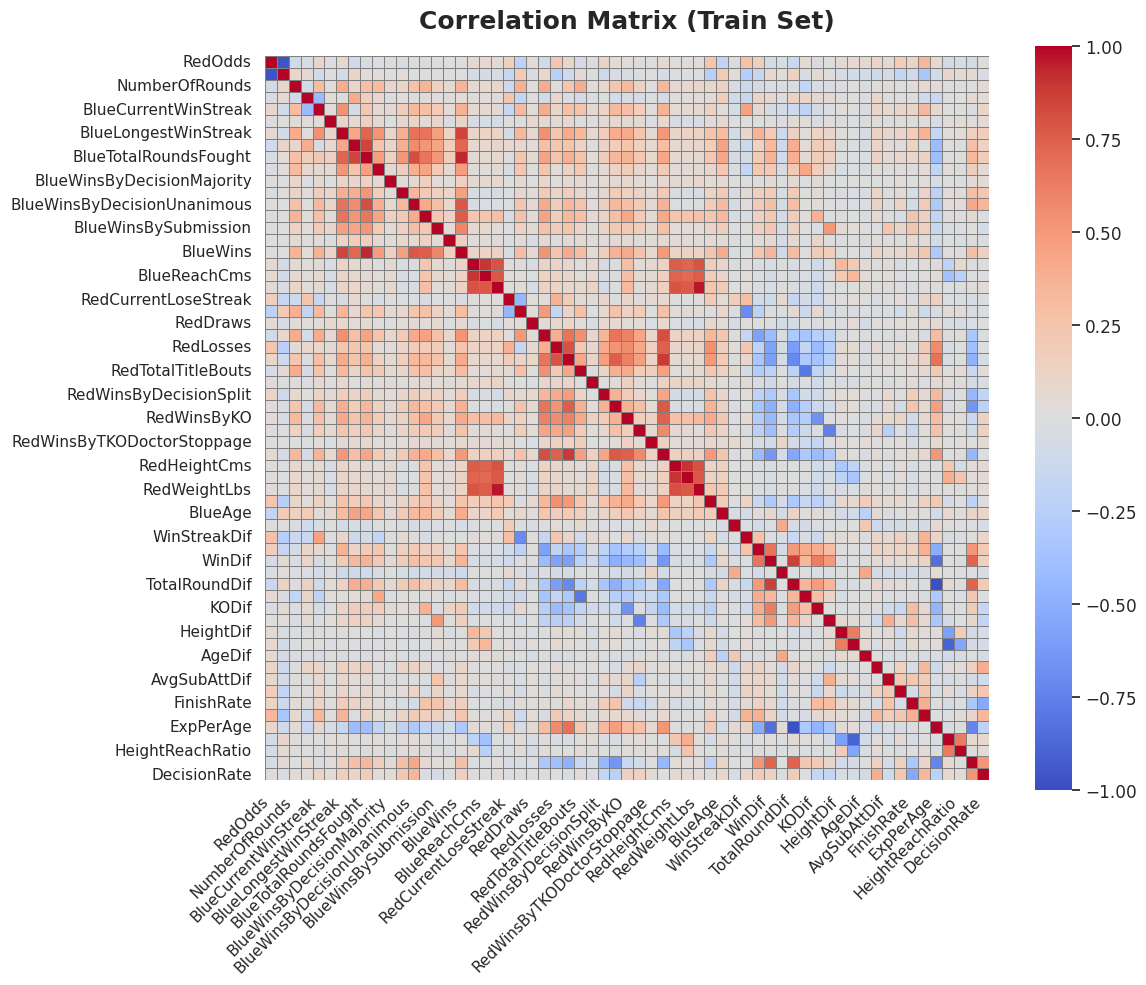

In [12]:
status = False
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)
ufc_data.plot_corr(processed = status)

### Feature Selection

Dado lo siguiente:
-  LoseStreakDif: BlueCurrentLoseStreak - RedCurrentLoseStreak
-  WinStreakDif: BlueCurrentWinStreak - RedCurrentWinStreak
-  LongestWinStreakDif: BlueLongestWinStreak - 'RedLongestWinStreak
-  WinDif: BlueWins - RedWins
-  LossDif: BlueLosses - RedLosses
-  TotalRoundDif: BlueTotalRoundsFought - RedTotalRoundsFought
-  TotalTitleBoutDif: BlueTotalTitleBouts - RedTotalTitleBouts
-  KODif: BlueWinsByKO - RedWinsByKO
-  SubDif: BlueWinsBySubmission - RedWinsBySubmission
-  HeightDif: BlueHeightCms - RedHeightCms
-  ReachDif: BlueReachCms - RedReachCms
-  AgeDif: BlueAge - RedAge
  
Se eliminan ciertas columnas que pueden ser redundantes.

In [13]:
ufc_df=ufc_df.drop(['BlueCurrentLoseStreak', 'RedCurrentLoseStreak','BlueCurrentWinStreak',
                      'RedCurrentWinStreak','BlueLongestWinStreak', 'RedLongestWinStreak', 'BlueWins',
                      'RedWins','BlueLosses','RedLosses', 'BlueTotalRoundsFought','RedTotalRoundsFought',
                      'BlueTotalTitleBouts', 'RedTotalTitleBouts', 'BlueWinsByKO', 'RedWinsByKO', 'BlueWinsBySubmission',
                      'RedWinsBySubmission','BlueHeightCms','RedHeightCms','BlueReachCms','RedReachCms',
                      'BlueAge', 'RedAge'], axis=1)

También aquellas relacionadas con los features construidos:
- WinsByDecision
- DecisionRate
- FinishRate


In [14]:
ufc_df=ufc_df.drop(['BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous',
       'BlueWinsByTKODoctorStoppage', 'RedWinsByDecisionMajority',
       'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous',
       'RedWinsByTKODoctorStoppage','BlueWinsByDecisionMajority'], axis=1)

### Low Variance columns
- BlueDraws
- RedDraws
- BlueWeightLbs
- RedWeightLbs
- TitleBout_True 

In [15]:
ufc_df = ufc_df.drop(['BlueDraws','RedDraws','BlueWeightLbs','RedWeightLbs'], axis=1)

In [16]:
# Preview the first few records
display(ufc_df.head())
display(ufc_df.columns)

,RedOdds,BlueOdds,TitleBout,Gender,NumberOfRounds,BlueStance,RedStance,LoseStreakDif,WinStreakDif,LongestWinStreakDif,...,AvgTDDif,BetterRank,label,FinishRate,WinRatio,ExpPerAge,ReachAdvantageRatio,HeightReachRatio,WinsByDecision,DecisionRate
0,205.0,-250.0,False,MALE,5,Southpaw,Orthodox,-1,5,-2,...,-1.83,Red,1,0.283333,-0.035714,0.477778,0.947368,-0.065058,-4,-0.283333
1,124.0,-148.0,False,MALE,3,Orthodox,Orthodox,0,0,-2,...,0.20,neither,0,0.293233,0.042614,1.222222,1.000000,0.028571,-9,-0.293233
2,-395.0,310.0,False,MALE,3,Orthodox,Southpaw,-1,4,0,...,1.72,Red,0,0.500000,0.095238,0.077799,1.046154,0.028733,-2,-0.500000
3,-340.0,270.0,False,MALE,3,Orthodox,Orthodox,1,0,-1,...,-3.62,neither,1,-0.100000,-0.261905,-0.453704,1.013158,0.025803,2,0.100000
4,185.0,-225.0,False,MALE,3,Orthodox,Orthodox,0,3,-2,...,0.25,neither,1,-0.607143,0.222222,0.064516,1.014493,0.013872,2,0.607143


Index(['RedOdds', 'BlueOdds', 'TitleBout', 'Gender', 'NumberOfRounds',
       'BlueStance', 'RedStance', 'LoseStreakDif', 'WinStreakDif',
       'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif',
       'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif',
       'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif', 'BetterRank',
       'label', 'FinishRate', 'WinRatio', 'ExpPerAge', 'ReachAdvantageRatio',
       'HeightReachRatio', 'WinsByDecision', 'DecisionRate'],
      dtype='object')

## 7. Update UFCData object

In [17]:
ufc_data = UFCData(ufc_df)
ufc_data.summary()

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6300
🧪 Train/Test split  : 5040 / 1260
🧪 Total features     : 30

🔢 Numerical features : 25
🔠 Categorical features: 5
    - Binary          : 2
    - Multiclass      : 3

🏷 Label distribution (raw):
   - Class 0: 3662 (58.1%)
   - Class 1: 2638 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                        mean      std       min       max
RedOdds             -115.702  279.516 -2100.000   775.000
BlueOdds              59.744  253.515 -1200.000  1300.000
NumberOfRounds         3.193    0.588     3.000     5.000
LoseStreakDif          0.068    1.012    -6.000     6.000
WinStreakDif          -0.142    1.887   -18.000    10.000
LongestWinStreakDif   -0.763    2.026   -12.000    14.000
WinDif                -1.496    4.167   -28.000    23.000
LossDif                0.102    3.103   -19.000    16.000
TotalRoundDif         -5.599   18.083  -448.000    87.000
TotalTit

## 8. Check Correlation Matrix

In [18]:
status = False
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)

,Feature 1,Feature 2,Correlation
175,TotalRoundDif,ExpPerAge,0.981060
0,RedOdds,BlueOdds,0.962640
241,ReachDif,ReachAdvantageRatio,0.894273
130,WinDif,TotalRoundDif,0.860521
142,WinDif,ExpPerAge,0.841164
178,TotalRoundDif,WinsByDecision,0.740159
145,WinDif,WinsByDecision,0.734128
292,ExpPerAge,WinsByDecision,0.731751
110,LongestWinStreakDif,WinDif,0.664174
294,ReachAdvantageRatio,HeightReachRatio,0.640314


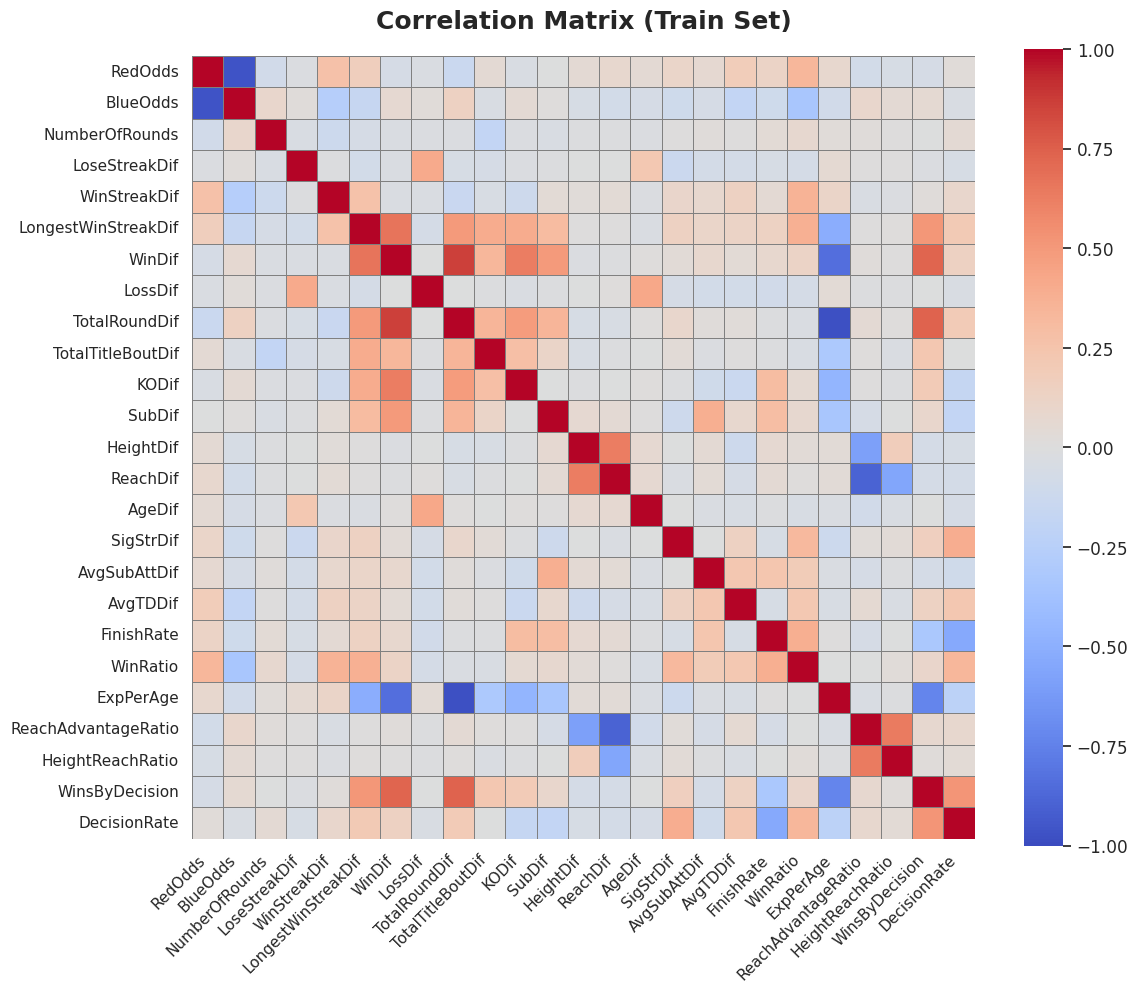

In [19]:
ufc_data.plot_corr(processed = status)

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 9. Inicialize Modeling Data: Standarize Numerical Data & Encode Categorical Data

In [20]:
ufc_data.standardize()
ufc_data.encode()

## 10. Check Modeling Correlation Matrix

In [21]:
status = True
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)

,Feature 1,Feature 2,Correlation
578,TotalRoundDif,ExpPerAge,0.981060
352,BetterRank_Red,BetterRank_neither,0.965605
403,RedOdds,BlueOdds,0.962640
644,ReachDif,ReachAdvantageRatio,0.894273
533,WinDif,TotalRoundDif,0.860521
238,RedStance_Orthodox,RedStance_Southpaw,0.848349
545,WinDif,ExpPerAge,0.841164
108,BlueStance_Orthodox,BlueStance_Southpaw,0.838789
581,TotalRoundDif,WinsByDecision,0.740159
548,WinDif,WinsByDecision,0.734128


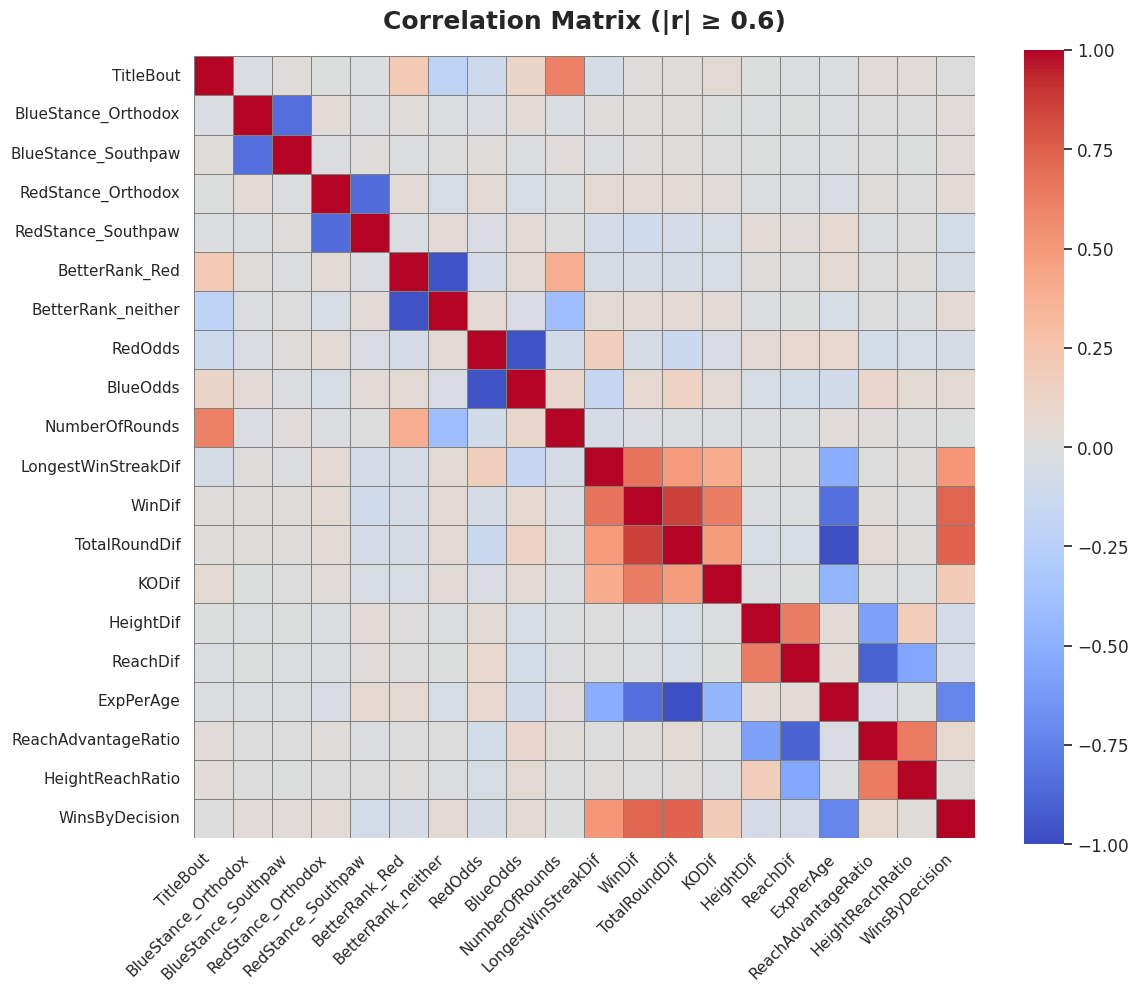

In [22]:
ufc_data.plot_corr(processed = status, threshold = 0.6)

## 11. Check Modeling Data

In [23]:
ufc_data._X_train_processed

,TitleBout,Gender_MALE,BlueStance_Open Stance,BlueStance_Orthodox,BlueStance_Southpaw,BlueStance_Switch,RedStance_Open Stance,RedStance_Orthodox,RedStance_Southpaw,RedStance_Switch,...,SigStrDif,AvgSubAttDif,AvgTDDif,FinishRate,WinRatio,ExpPerAge,ReachAdvantageRatio,HeightReachRatio,WinsByDecision,DecisionRate
220,0,0,0,0,1,0,0,0,1,0,...,-0.232023,0.084453,-0.098641,0.171029,0.276019,-0.475248,0.615013,0.390532,0.262855,0.127751
2052,0,1,0,1,0,0,0,0,1,0,...,-0.013272,0.084453,-0.379440,-1.928766,-1.109916,-0.000898,0.890250,1.140561,0.262855,0.127751
1641,0,0,0,1,0,0,0,1,0,0,...,0.156924,-0.600412,0.950058,-1.403817,-1.109916,0.741330,2.107110,1.286880,-0.141414,-0.416150
5261,0,0,0,1,0,0,0,1,0,0,...,0.493811,0.084453,0.090469,0.171029,0.276019,-0.405015,2.425942,1.759682,0.262855,0.127751
3434,0,1,0,1,0,0,0,0,1,0,...,0.070409,-0.058227,2.669237,1.220927,-0.185960,0.422578,-1.693653,-0.680337,-0.545682,-0.960052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0,1,0,1,0,0,0,1,0,0,...,0.060313,-0.029691,-0.230444,-0.878868,-1.109916,1.368543,-0.337825,-0.022437,-0.949951,-0.960052
575,0,1,0,0,1,0,0,1,0,0,...,0.136901,0.997606,-1.548482,0.730975,-0.070465,0.361667,0.903867,1.534356,-0.545682,-0.452410
761,0,1,0,1,0,0,0,0,0,1,...,0.072827,2.253190,-0.568550,-1.928766,-2.495851,-0.182564,0.277873,-0.033662,0.262855,0.127751
6159,0,1,0,1,0,0,0,1,0,0,...,-0.920315,-1.627708,-1.557078,-0.353919,-1.109916,1.370873,-1.831261,-0.383486,-0.949951,-1.503953


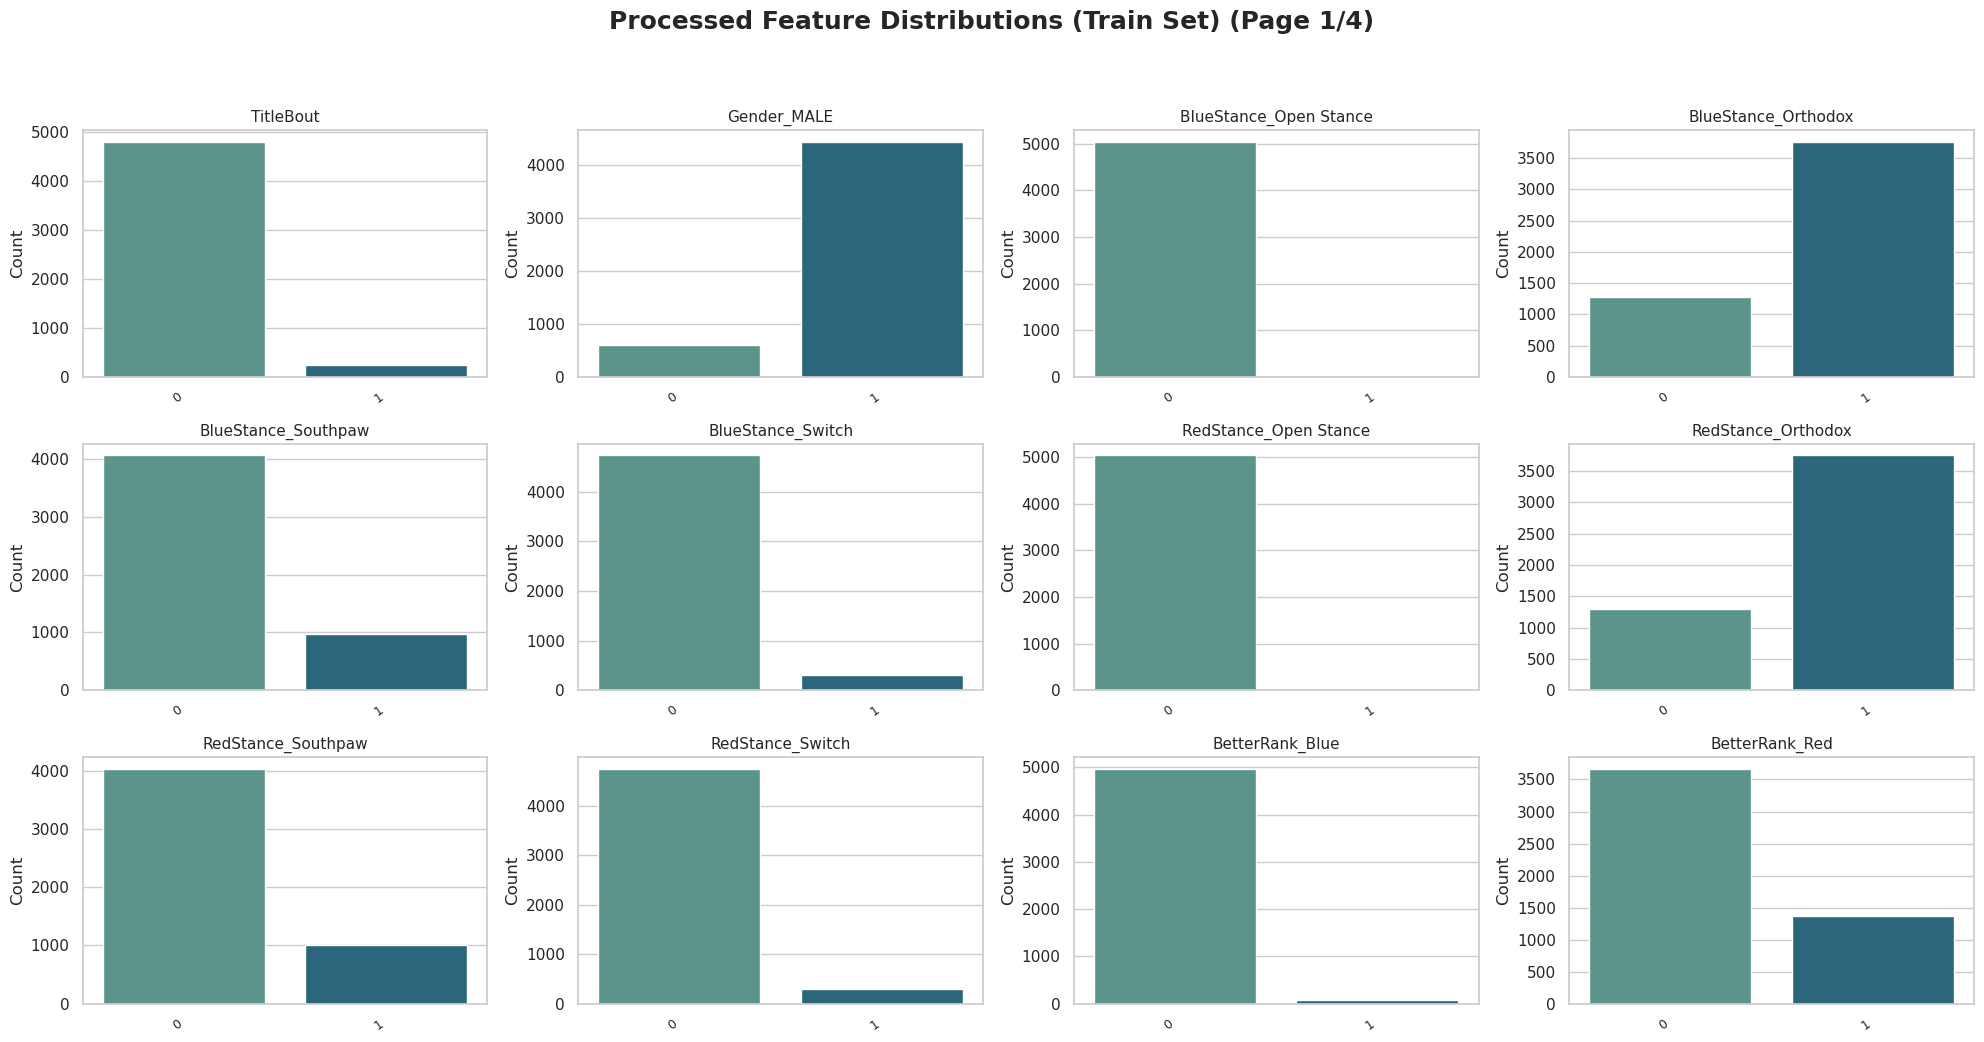

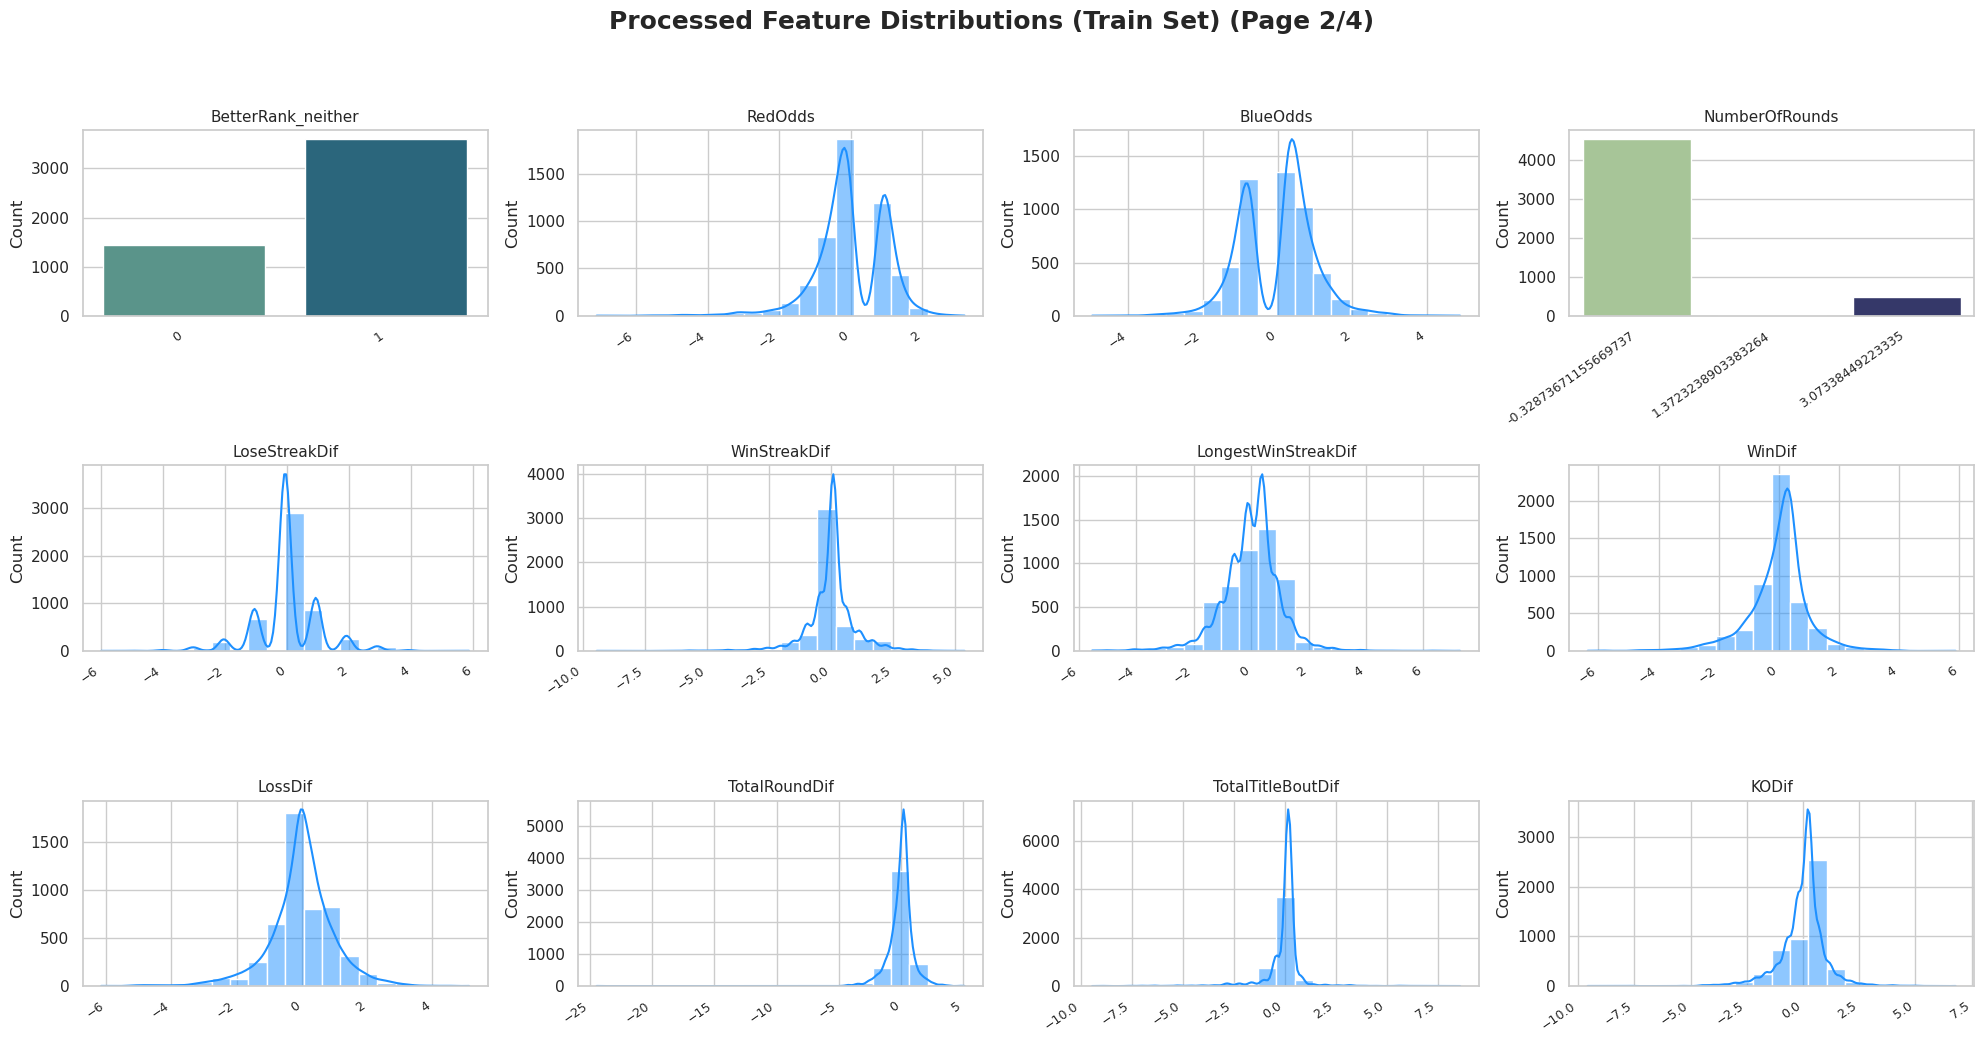

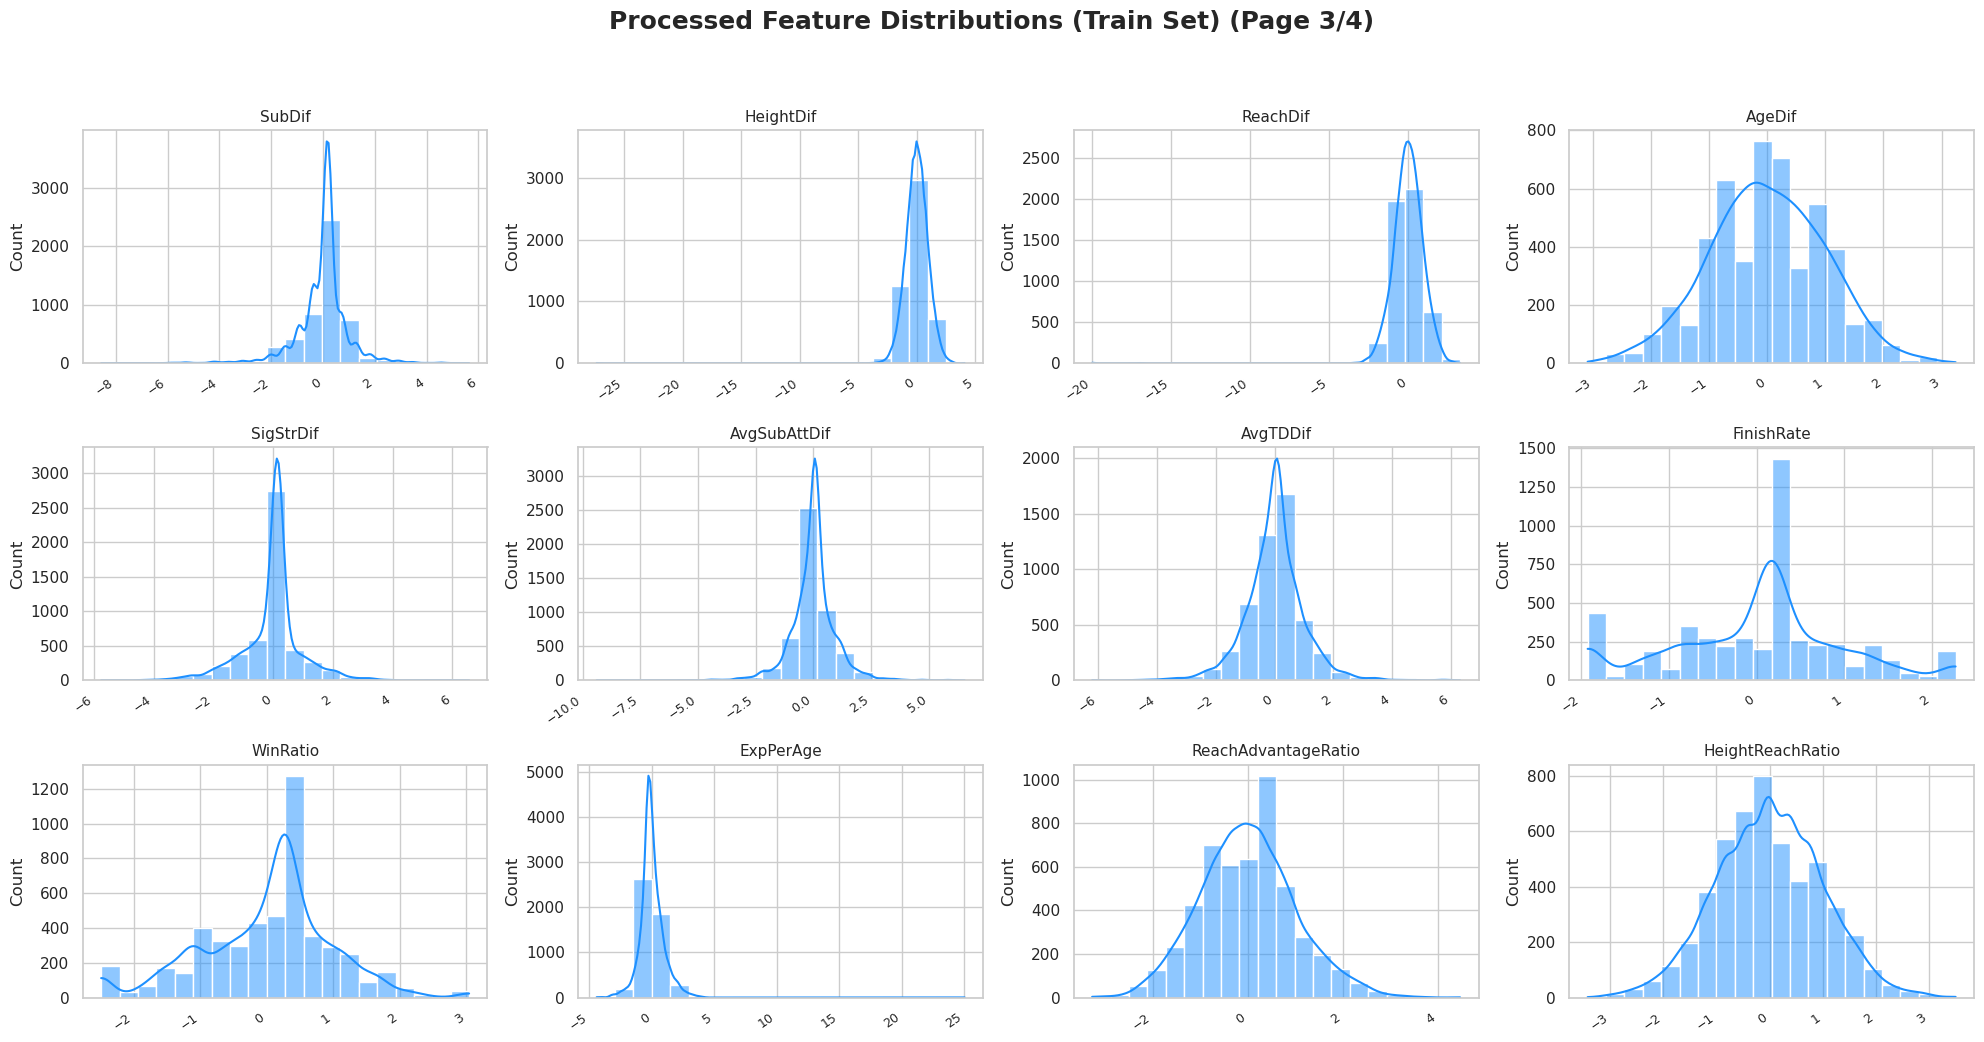

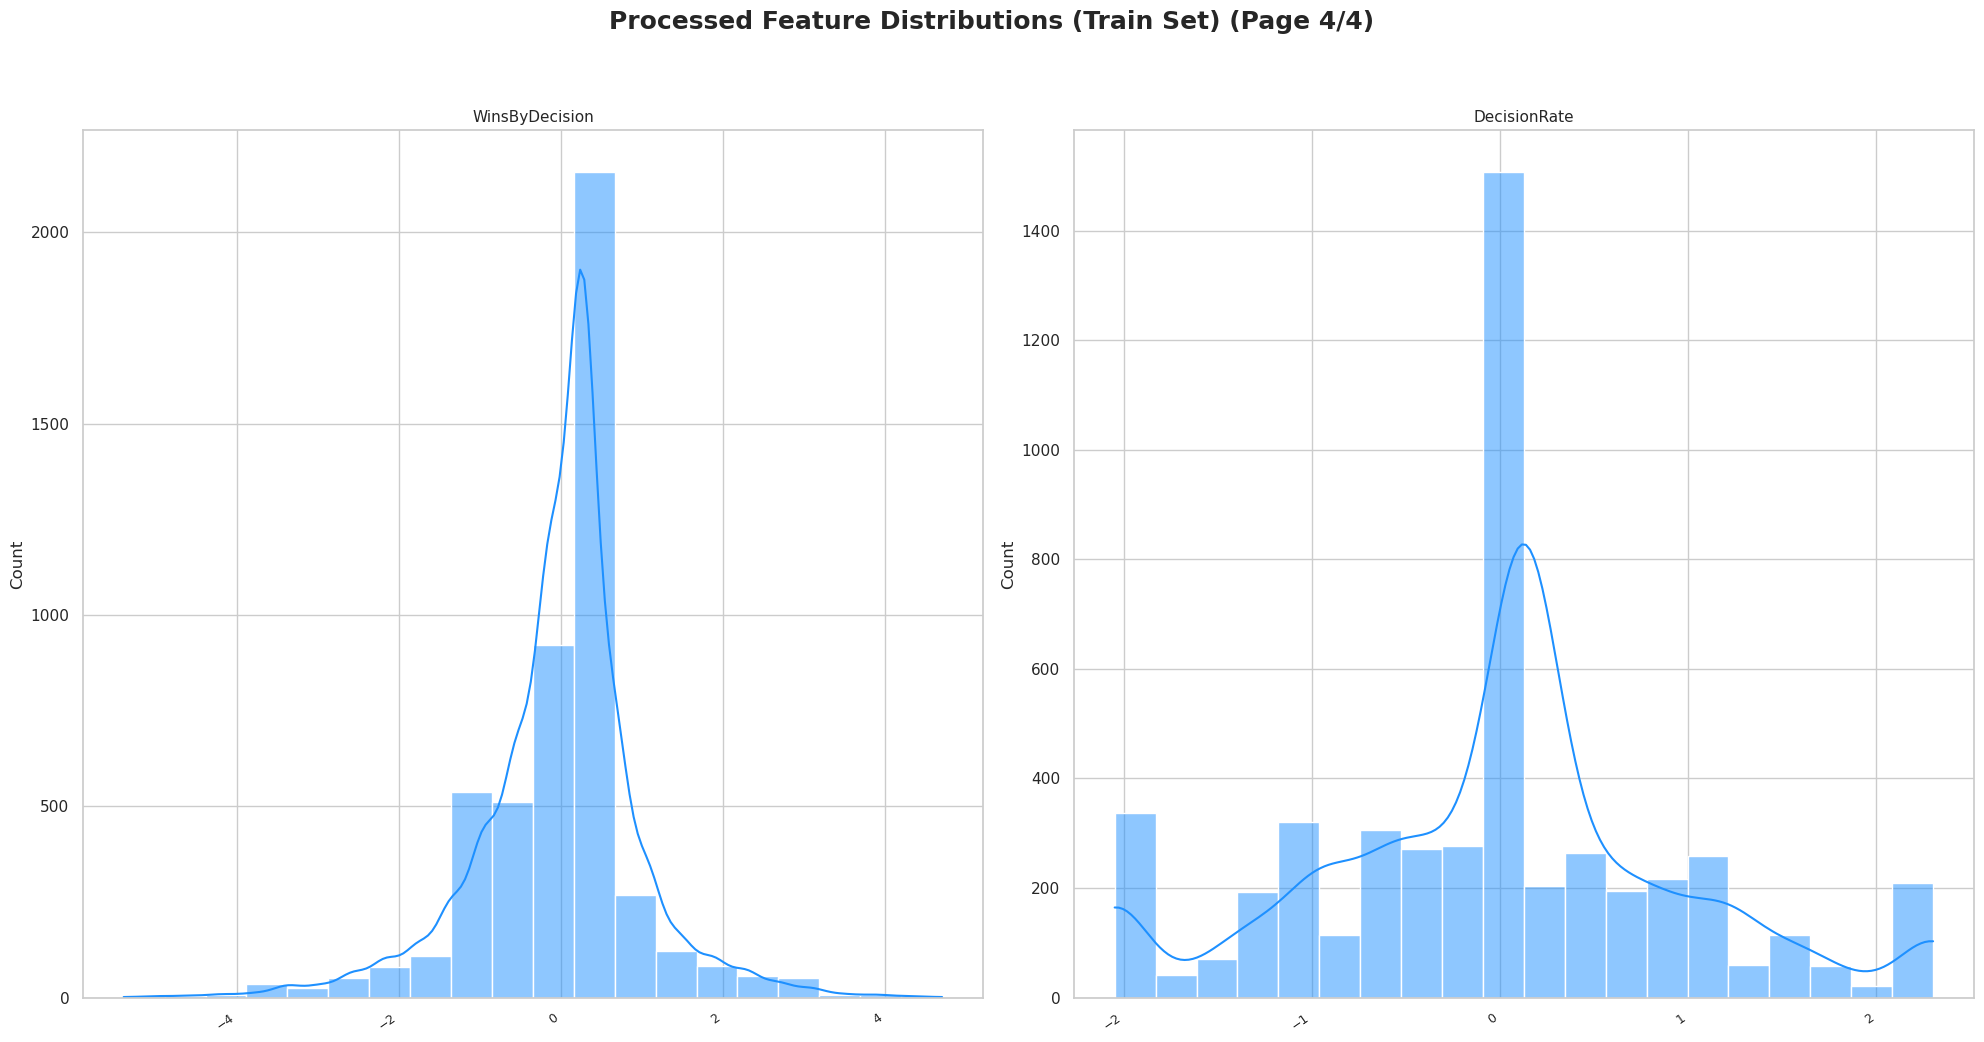

In [24]:
ufc_data.plot_feature_distributions(processed = True)

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 12. Save

In [25]:
ufc_modeling_data = ufc_data

In [26]:
save_data(ufc_modeling_data)

✅ UFCData object saved to: /home/mlioi/ufc-predictor/data/processed/ufc_data.pkl


In [27]:
save_ufc_datasets(ufc_modeling_data, project_root)

✅ UFCData object saved to: dict_keys(['ufc_train.csv', 'ufc_test.csv', 'ufc_processed_train.csv', 'ufc_processed_test.csv'])


<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>